# Purpose  
   
Preprocess Video Sales data from Kaggle 


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
import os
csv_file_path = os.getenv('HOME') + '/aiffel/data_preprocess/data/vgsales.csv'
sales = pd.read_csv(csv_file_path)
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 1. Preprocessing

## 1) Missing Values 

In [10]:
#Check if there are any missing values 


sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
#Remove all the rows with missing values

sales = sales.dropna(subset=['Year', 'Publisher'], axis=0)
sales = sales.reset_index(drop=True)

In [12]:
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 2) Data Type

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
sales['Year'] = sales['Year'].astype(int)
sales['Year'].dtype

dtype('int64')

## 3) Duplicate

In [15]:
sales[sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [16]:
len(sales) - len(sales.drop_duplicates())

0

# 2. Standardization

In [31]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']
sales_stand = (sales[cols] - sales[cols].mean())/ sales[cols].std()
sales_stand.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,50.124931,56.689775,11.835234,44.252142,52.444813
1,35.035540,6.739150,21.582588,3.796102,25.328886
2,18.949106,24.999402,11.899361,17.158695,22.508829
3,18.827515,21.327717,10.264115,15.317393,20.709608
4,13.380257,17.165165,32.516298,5.006100,19.669632


In [32]:
sales_stand.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1.629100e+04,1.629100e+04,1.629100e+04,1.629100e+04,1.629100e+04
mean,-5.582805e-17,-5.582805e-17,-5.582805e-17,5.582805e-17,5.582805e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.230013e-01,-2.900656e-01,-2.527678e-01,-2.547632e-01,-3.387324e-01
25%,-3.230013e-01,-2.900656e-01,-2.527678e-01,-2.547632e-01,-3.068313e-01
50%,-2.257289e-01,-2.507962e-01,-2.527678e-01,-2.021546e-01,-2.366489e-01
75%,-3.118394e-02,-7.408413e-02,-1.245131e-01,-4.432869e-02,-3.886211e-02
max,5.012493e+01,5.668978e+01,3.251630e+01,5.535256e+01,5.244481e+01


# 3. Binning

In [40]:
ctg = pd.qcut(sales['Global_Sales'], q=5)
ctg

0                       (0.61, 82.74]
1                       (0.61, 82.74]
2                       (0.61, 82.74]
3                       (0.61, 82.74]
4                       (0.61, 82.74]
                     ...             
16286    (0.009000000000000001, 0.05]
16287    (0.009000000000000001, 0.05]
16288    (0.009000000000000001, 0.05]
16289    (0.009000000000000001, 0.05]
16290    (0.009000000000000001, 0.05]
Name: Global_Sales, Length: 16291, dtype: category
Categories (5, interval[float64, right]): [(0.009000000000000001, 0.05] < (0.05, 0.12] < (0.12, 0.25] < (0.25, 0.61] < (0.61, 82.74]]

In [41]:
print(ctg.value_counts().sort_index())

(0.009000000000000001, 0.05]    3698
(0.05, 0.12]                    3106
(0.12, 0.25]                    2991
(0.25, 0.61]                    3263
(0.61, 82.74]                   3233
Name: Global_Sales, dtype: int64


# 4. EDA

## Genre Popularity

In [17]:
# What Genre have been popular the most ? 

sales['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

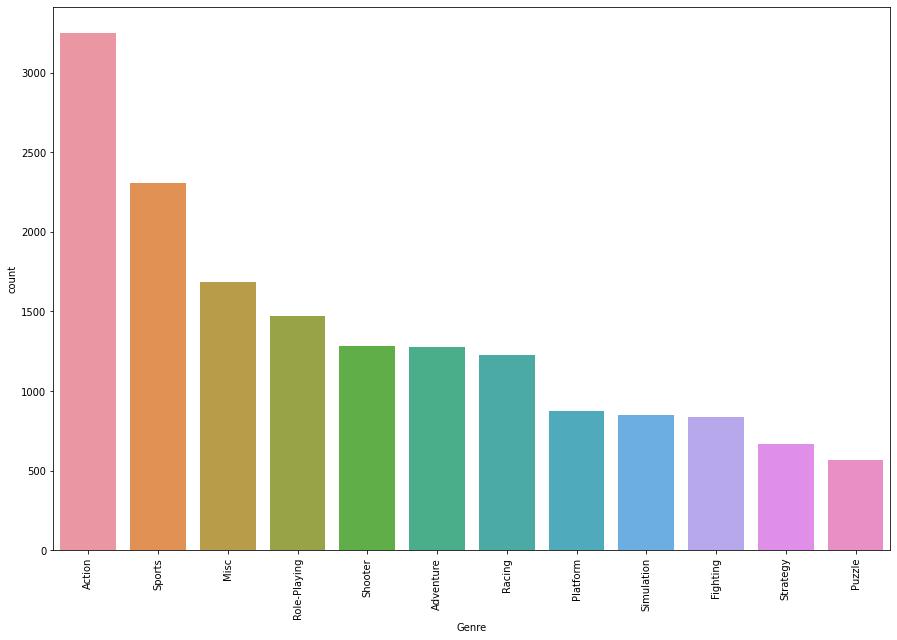

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Genre', data=sales, order=sales['Genre'].value_counts().index)
plt.xticks(rotation=90)

> Action, Sports genre aret the most popular 

## Year Popularity 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1981'),
  Text(25, 0, '1992'),
  Text(26, 0, '1991'),
  Text(27, 0, '1982'),
  Text(28, 0, '1986'),
  Text(29, 0, '1989'),
  Text(30, 0, '1983'),
  Text(31, 0, '1987'),
  Text(32, 0, '1990'),
  Text(33, 0, '1988'),
  Text(34, 0, '1985'),
  Text(35, 0, '1984'),


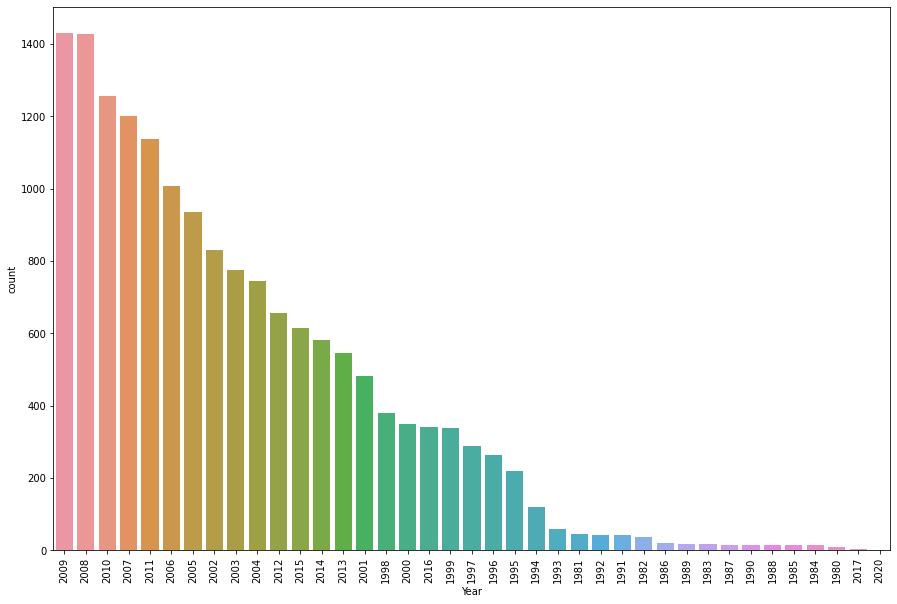

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data=sales, order= sales.groupby('Year')['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

## Global sales ranking by Year

In [20]:
#Groupby : 그룹별로 분할하여, 그룹별로 통계량 확인 (groupby함수 + 통계함수)

sales_year = sales.groupby('Year')['Global_Sales'].sum()
sales_year = sales_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),


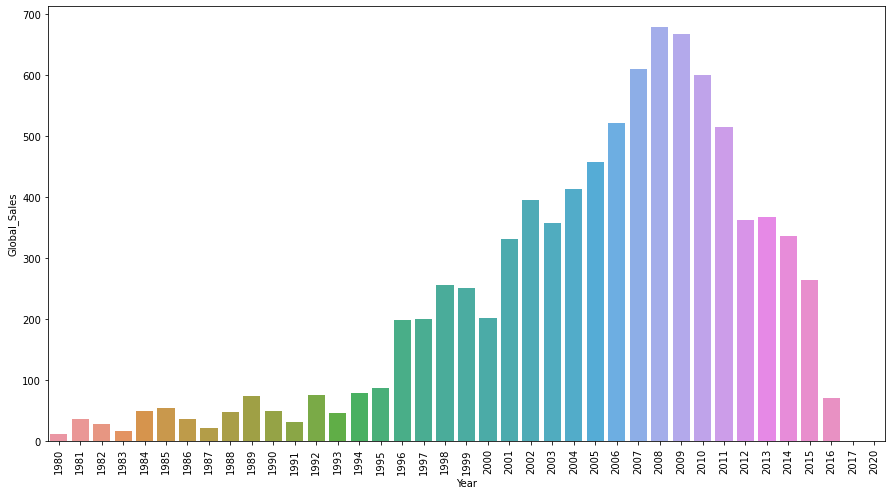

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x='Year', y='Global_Sales', data=sales_year)
plt.xticks(rotation=90)

## What Platform has the highest sale price?

In [22]:
#sort_values 값을 기준으로 레이블을 정렬한다 
#df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

sales_platform = sales.groupby('Platform')['Global_Sales'].sum().reset_index()
sales_platform = sales_platform.sort_values(by=['Global_Sales'], ascending=False)

In [23]:
sales_platform.head()

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91


<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

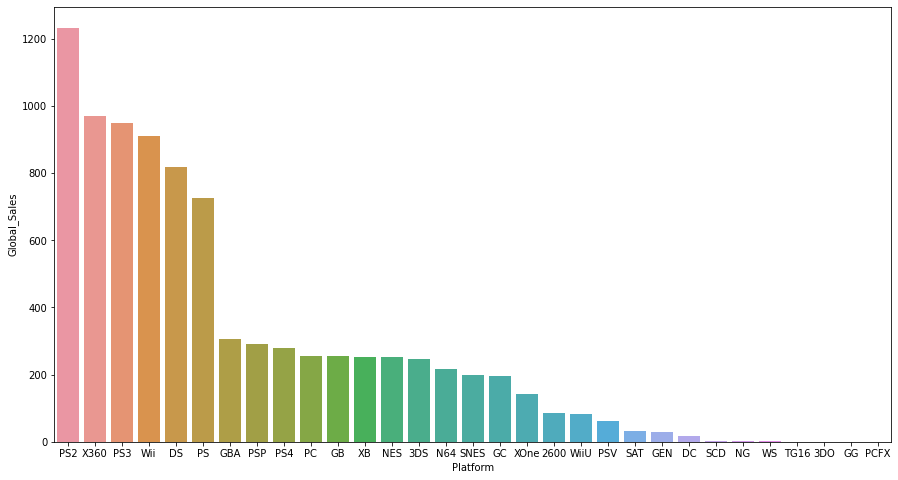

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x='Platform', y='Global_Sales', data=sales_platform)

## Sales of Diff Genre by Country

Text(0.5, 1.0, 'Sales of different genre in Europe')

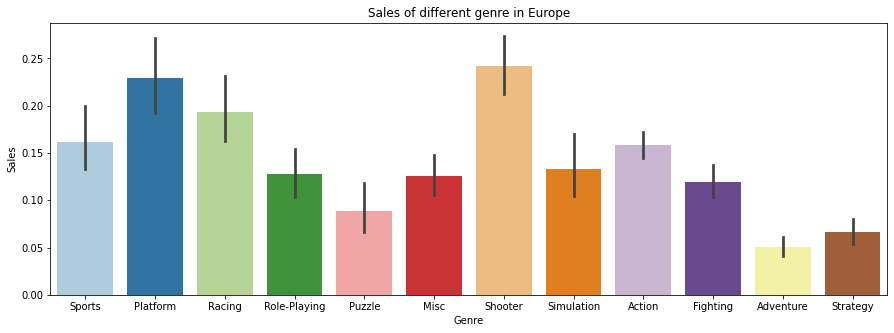

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='EU_Sales', data=sales, palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')


Text(0.5, 1.0, 'Sales of different genre in North America')

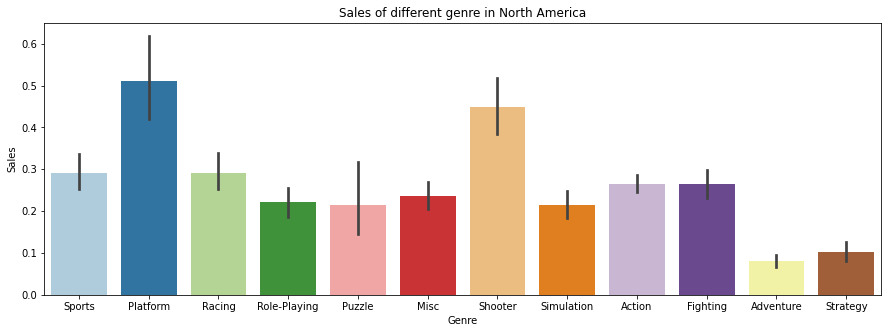

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='NA_Sales', data=sales, palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

Text(0.5, 1.0, 'Sales of different genre in Japan')

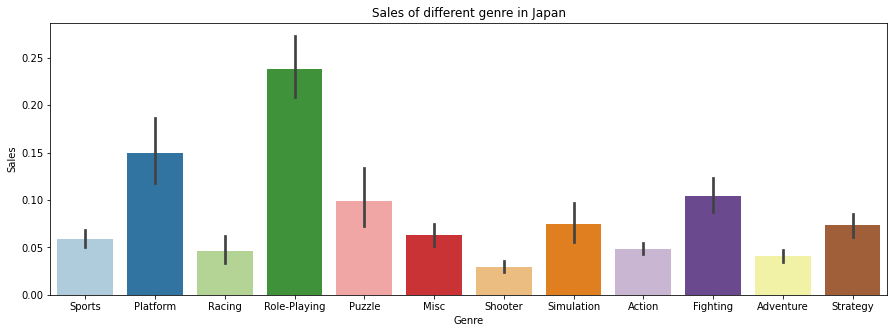

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='JP_Sales', data=sales, palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

Text(0.5, 1.0, 'Sales of different genre Globally')

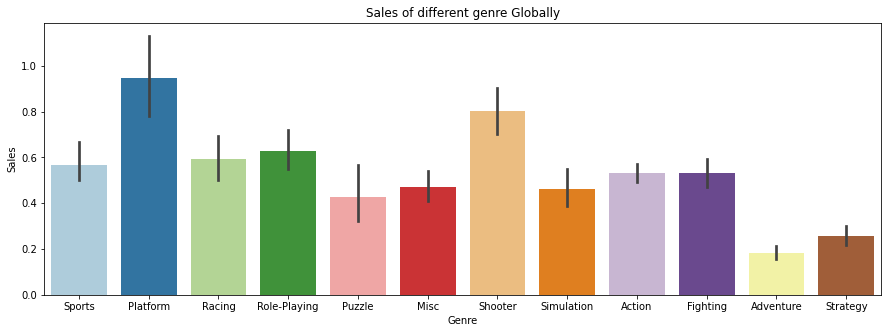

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='Global_Sales', data=sales, palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')